In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/netflix_titles.csv')
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
# Shape and structure
print("Shape of the dataset:", df.shape)
df.info()

# Peek at the data
df.head()


Shape of the dataset: (8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


/tmp/ipython-input-7-1525044002.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='coolwarm')


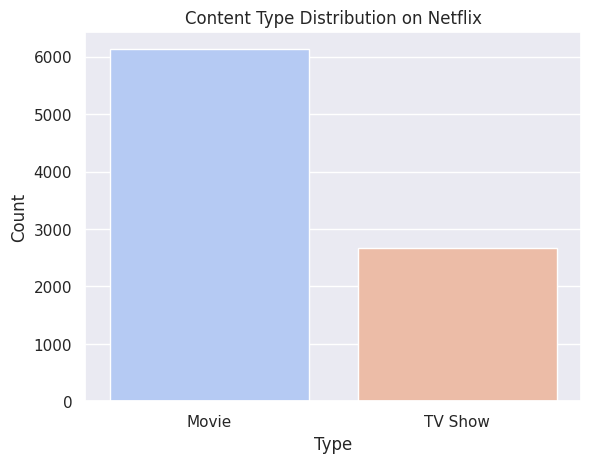

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='darkgrid')

sns.countplot(x='type', data=df, palette='coolwarm')
plt.title('Content Type Distribution on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


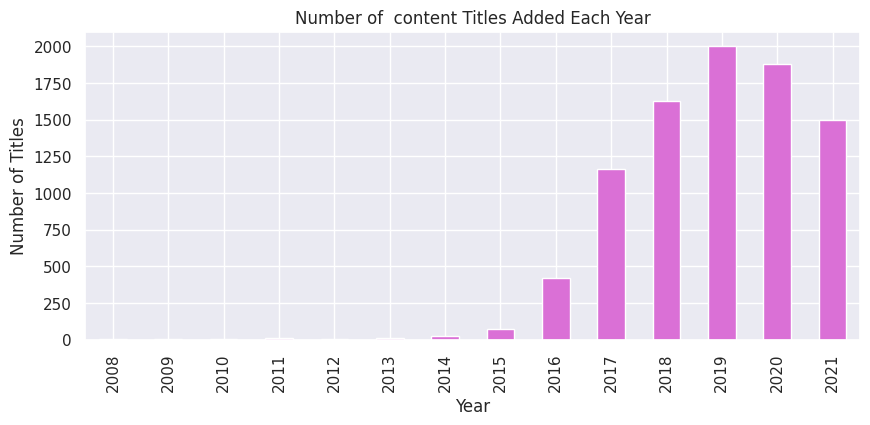

In [10]:
# Force convert to datetime and drop invalid rows
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df = df.dropna(subset=['date_added'])

# Now safely extract year
df['year_added'] = df['date_added'].dt.year

# Plot the trend
df['year_added'].value_counts().sort_index().plot(kind='bar', figsize=(10,4), color='orchid')
plt.title("Number of  content Titles Added Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()


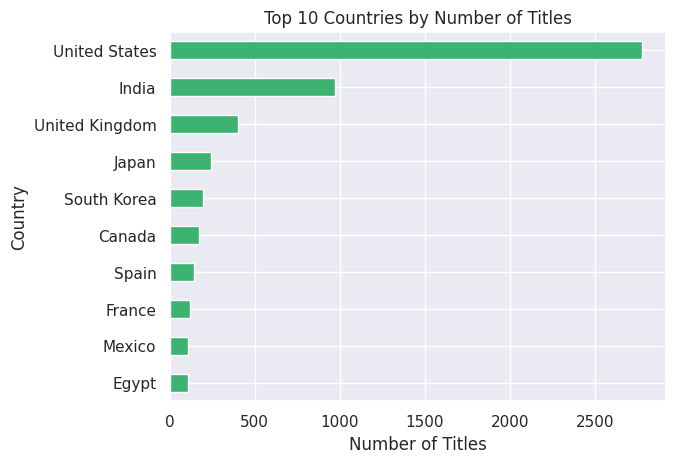

In [11]:
top_countries = df['country'].value_counts().head(10)

top_countries.plot(kind='barh', color='mediumseagreen')
plt.title('Top 10 Countries by Number of Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.gca().invert_yaxis()
plt.show()


/tmp/ipython-input-12-1170494026.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genres.values, y=genres.index, palette='flare')


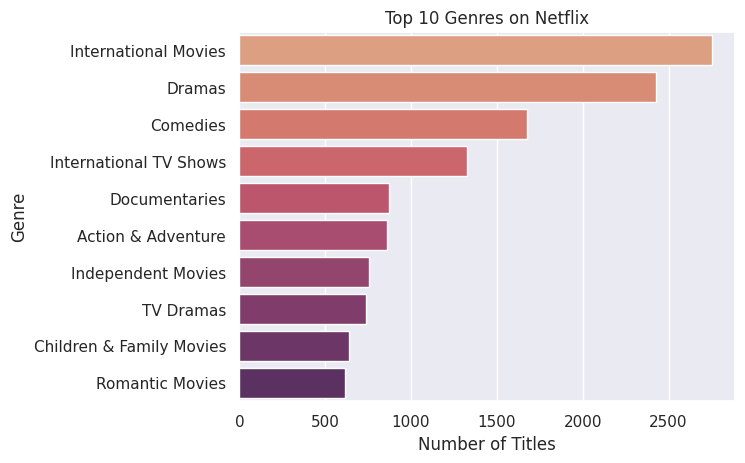

In [12]:
genres = df['listed_in'].str.split(', ', expand=True).stack().value_counts().head(10)

sns.barplot(x=genres.values, y=genres.index, palette='flare')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()


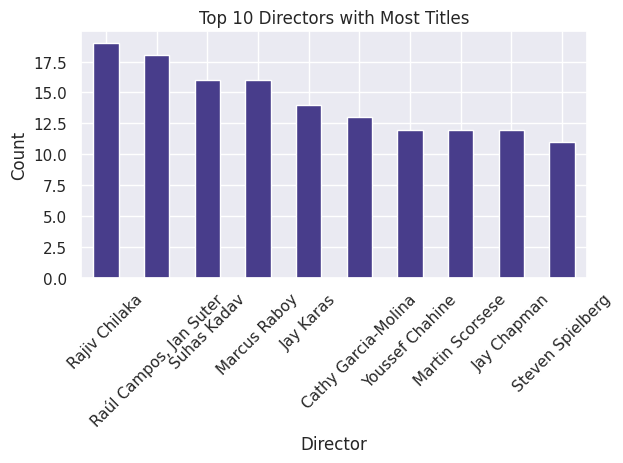

In [13]:
top_directors = df['director'].value_counts().head(10)

top_directors.plot(kind='bar', color='darkslateblue')
plt.title('Top 10 Directors with Most Titles')
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


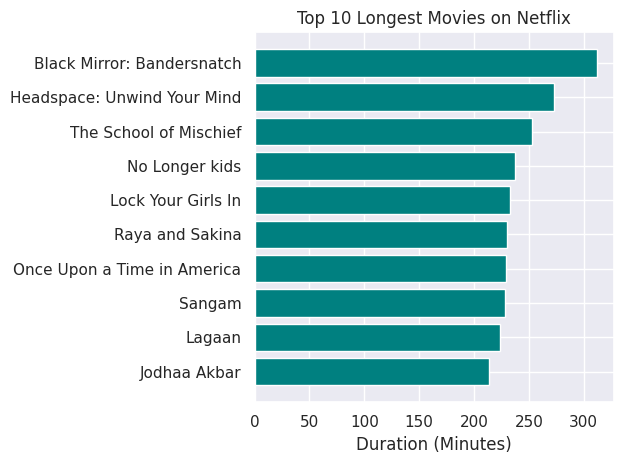

In [16]:
# Filter Movies only
movies = df[df['type'] == 'Movie'].copy()

# Drop rows with NaN in 'duration'
movies = movies.dropna(subset=['duration'])

# Remove ' min' and convert to integer safely
movies['minutes'] = movies['duration'].str.replace(' min', '').astype(int)

# Plot top 10 longest movies
top_movies = movies.sort_values(by='minutes', ascending=False).head(10)

plt.barh(top_movies['title'], top_movies['minutes'], color='teal')
plt.xlabel("Duration (Minutes)")
plt.title("Top 10 Longest Movies on Netflix")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


/tmp/ipython-input-17-1806034453.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_ratings.values, y=top_ratings.index, palette='mako')


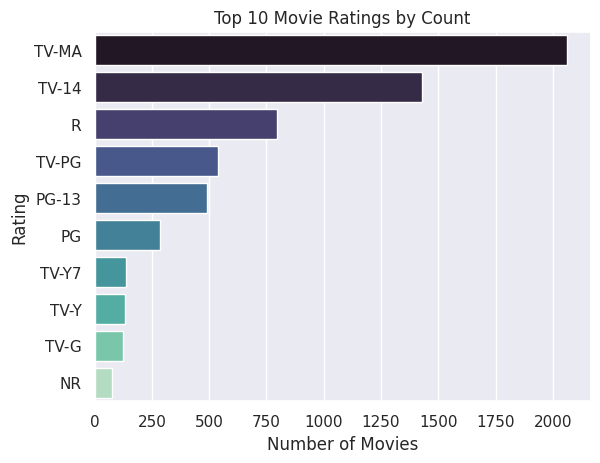

In [17]:
# Filter for Movies only
movies = df[df['type'] == 'Movie'].copy()

# Count of movies by rating
top_ratings = movies['rating'].value_counts().head(10)

# Plot it
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=top_ratings.values, y=top_ratings.index, palette='mako')
plt.title("Top 10 Movie Ratings by Count")
plt.xlabel("Number of Movies")
plt.ylabel("Rating")
plt.show()
